## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_song_features.csv")

In [2]:
df.head()

,id,name,popularity,explicit,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,release_date,prime_artist
0,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,87,False,222973,0.00121,0.352,0.911,0.0000,1,0.0995,-5.230,1,0.0747,148.033,0.236,2004,The Killers
1,005lwxGU1tms6HGELIcUv9,I Kissed A Girl,73,False,179640,0.00223,0.699,0.760,0.0000,5,0.1320,-3.173,1,0.0677,129.996,0.696,2008-06-17,Katy Perry
2,009ImBOrIUlWgla8U05RAC,Unconditionally,80,False,228879,0.00273,0.432,0.725,0.0000,7,0.2080,-4.862,1,0.0431,128.902,0.353,2013-01-01,Katy Perry
3,00cxhG668jV6gU6VK2FUVI,Acceptable in the 80's,59,False,333680,0.01430,0.787,0.808,0.2570,7,0.0466,-5.454,1,0.0511,127.990,0.942,2007-06-18,Calvin Harris
4,00FDHurakzVEiPutdUxXXq,Wouldn't It Be Good,66,False,277053,0.16900,0.655,0.705,0.0139,2,0.0698,-8.529,0,0.0285,97.007,0.749,1984-01-01,Nik Kershaw


In [3]:
df.describe()

,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,4923.000000,4.923000e+03,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000
mean,65.785903,2.441434e+05,0.198348,0.632847,0.664083,0.030310,5.331302,0.174339,-7.915290,0.660776,0.073072,119.782870,0.597858
std,10.558137,6.099893e+04,0.226246,0.148104,0.189570,0.121586,3.598293,0.142452,3.456382,0.473494,0.076354,26.747683,0.239210
min,1.000000,9.286700e+04,0.000005,0.135000,0.026400,0.000000,0.000000,0.015000,-24.709000,0.000000,0.022500,50.937000,0.037700
25%,58.000000,2.091600e+05,0.025900,0.541000,0.534000,0.000000,2.000000,0.083900,-10.032000,0.000000,0.032800,99.933000,0.412000
50%,66.000000,2.351330e+05,0.103000,0.646000,0.687000,0.000009,5.000000,0.119000,-7.203000,1.000000,0.043400,119.005000,0.617000
75%,74.000000,2.691730e+05,0.300000,0.739000,0.819000,0.001002,9.000000,0.223000,-5.281500,1.000000,0.073000,133.657000,0.799000
max,94.000000,1.561133e+06,0.978000,0.980000,0.999000,0.985000,11.000000,0.989000,-0.140000,1.000000,0.911000,210.857000,0.989000


## Preprocessing

In [4]:
# calculate duration in seconds and minutes
df["duration_seconds"] = df["duration_ms"].apply(lambda x: x // 1000)
df["duration_minutes"] = df["duration_ms"].apply(lambda x: x / 1000 / 60)

In [5]:
# convert multivalued realease_date into atomar fields
import regex as re

df["year"] = df["release_date"].apply(lambda x: x[:4]).apply(lambda x: int(x))

rows_len_10 = df["release_date"].apply(lambda x: len(x) == 10)

df["month"] = df[rows_len_10]["release_date"].apply(lambda x: re.search("\w{4}-(\w{2})-\w{2}", x).group(1)).apply(lambda x: int(x))

df["day"] = df[rows_len_10]["release_date"].apply(lambda x: re.search("\w{4}-\w{2}-(\w{2})", x).group(1)).apply(lambda x: int(x))


In [6]:
df[["release_date","year","month","day"]].head() # note all entries are strings

,release_date,year,month,day
0,2004,2004,NaN,NaN
1,2008-06-17,2008,6.0,17.0
2,2013-01-01,2013,1.0,1.0
3,2007-06-18,2007,6.0,18.0
4,1984-01-01,1984,1.0,1.0


In [7]:
np.sort(df["year"].unique())

array([1967, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

In [8]:
df["year"].nunique()

56

In [9]:
df["month"].unique()

array([nan,  6.,  1.,  4., 10.,  5.,  3.,  9.,  2.,  7., 11.,  8., 12.])

In [10]:
df["month"].nunique()

12

In [11]:
df["day"].unique()

array([nan, 17.,  1., 18., 13.,  4., 28., 29., 27.,  2.,  6.,  9., 14.,
       23., 24., 30., 10., 26., 20., 22., 25., 12., 15., 11., 31.,  3.,
        8., 21., 19.,  7.,  5., 16.])

In [12]:
df["day"].nunique()

31

### How many missing fields?

In [13]:
df.isna().sum()

id                    0
name                  0
popularity            0
explicit              0
duration_ms           0
acousticness          0
danceability          0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo                 0
valence               0
release_date          0
prime_artist          0
duration_seconds      0
duration_minutes      0
year                  0
month               752
day                 752
dtype: int64

In [14]:
# remove songs missing full release date
df_release = df.dropna()

# Visualization

<AxesSubplot:xlabel='duration_minutes', ylabel='Count'>

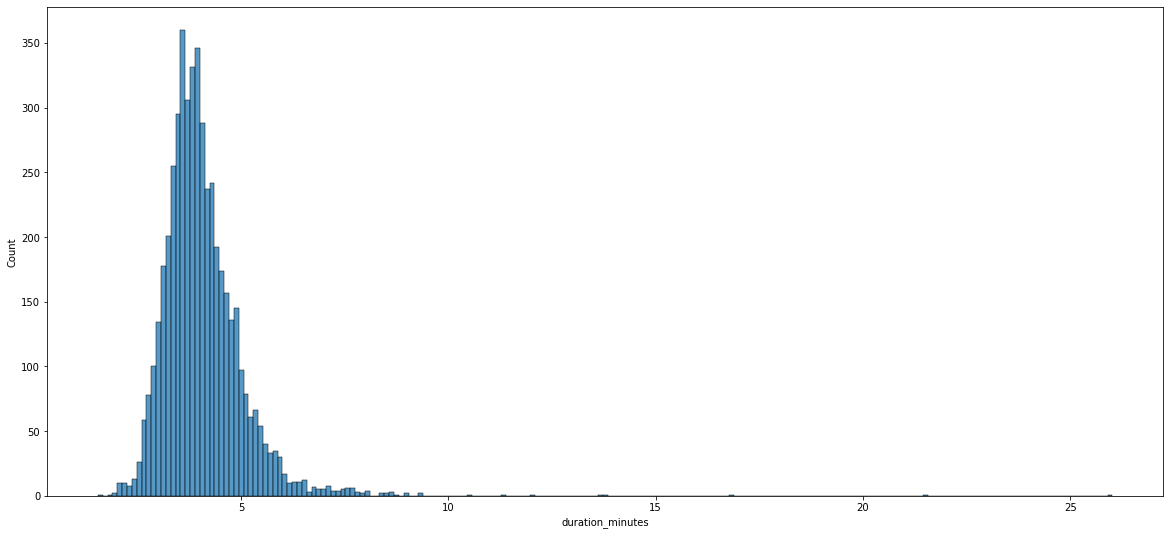

In [15]:
fig, ax = plt.subplots(figsize=(20,9))
sns.histplot(ax=ax, data=df, x="duration_minutes")

In [16]:
type(df.iloc[2]["month"])

numpy.float64

<AxesSubplot:xlabel='year', ylabel='duration_minutes'>

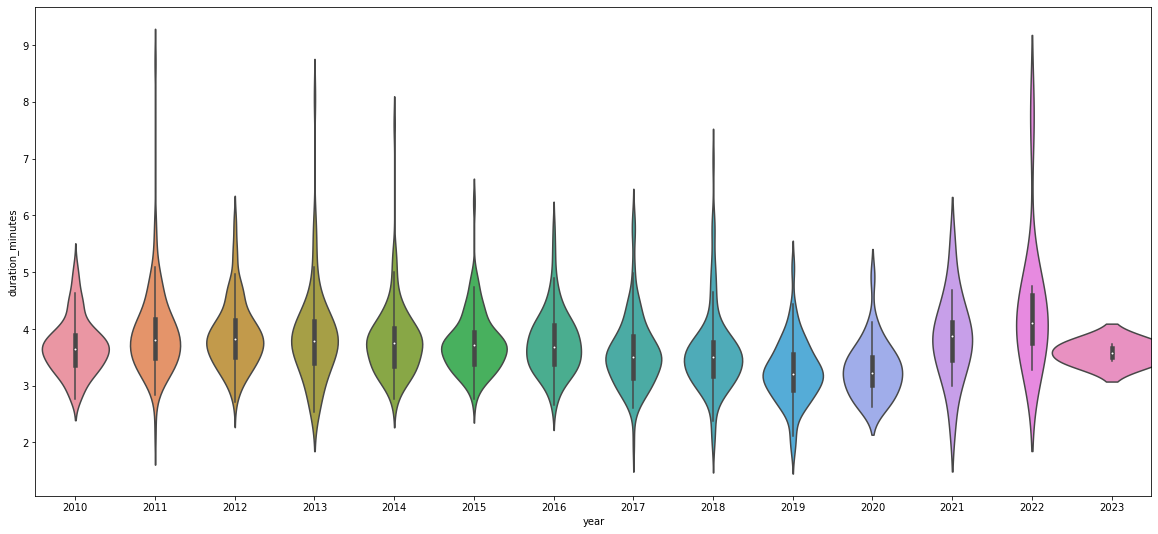

In [17]:
fig, ax = plt.subplots(figsize=(20,9))
sns.violinplot(ax=ax, data=df[df["year"]>= 2010],x="year",y="duration_minutes", width=1.5)

Text(0, 0.5, 'number of Songs')

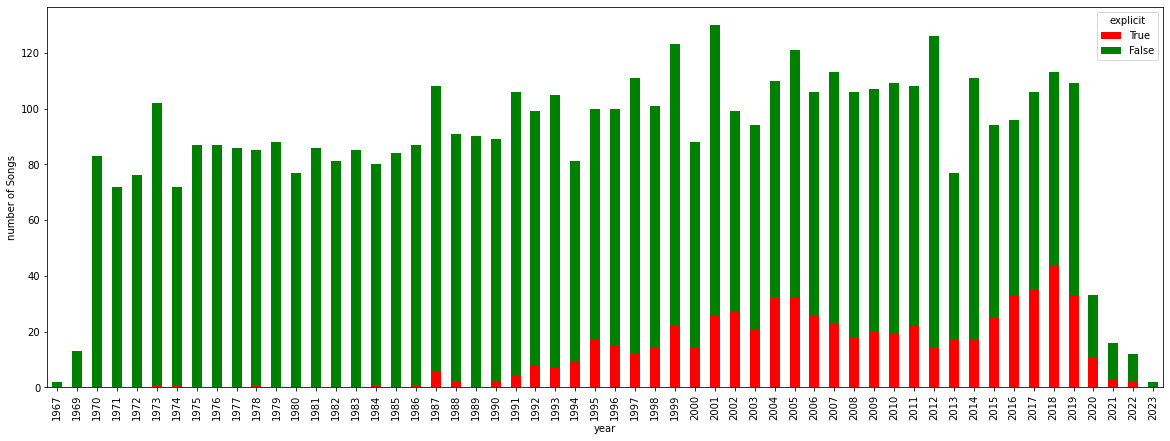

In [23]:
# plotting absolute count of explicit vs non-explicit songs by year
ax = pd.crosstab(index=df['year'],columns=df["explicit"]).loc[(slice(None), (True,False))].plot(kind="bar", stacked=True, color=["red","green"], figsize=(20,7))
ax.set_ylabel("number of Songs")

Text(0, 0.5, 'percentage explicit')

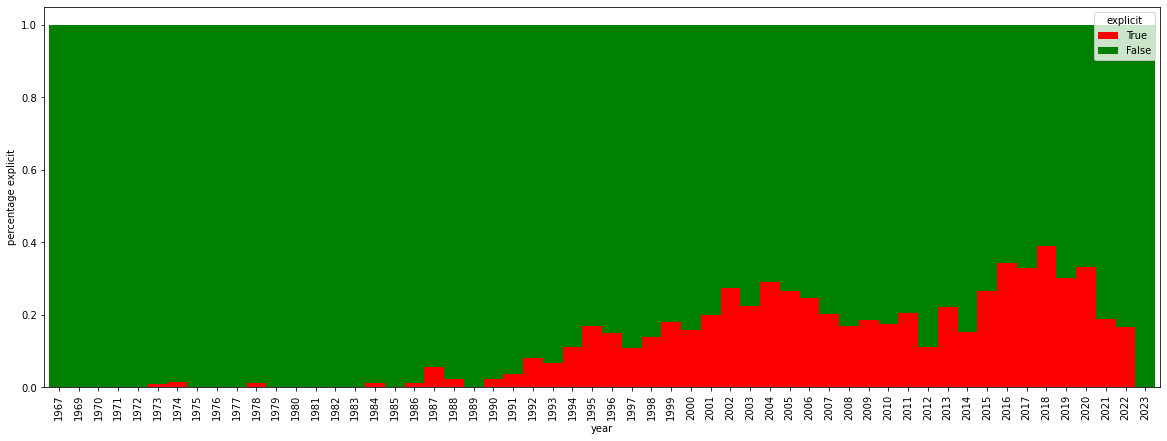

In [18]:
# plotting ratio of explicit songs by year
ax = pd.crosstab(index=df['year'],columns=df["explicit"], normalize="index").loc[(slice(None), (True,False))].plot(kind="bar", stacked=True, color=["red","green"], figsize=(20,7), width=1)
ax.set_ylabel("percentage explicit")

## audio features inspection

<AxesSubplot:>

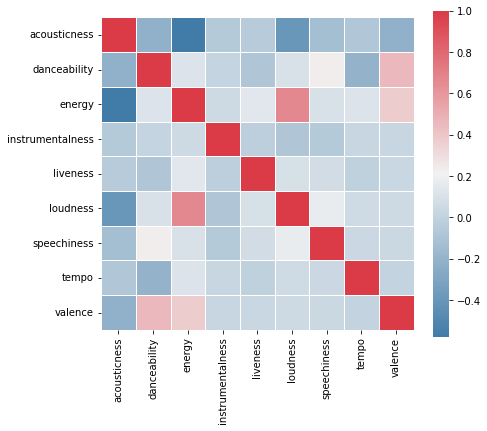

In [20]:
# corrplots
corr = df[["acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"]].corr()

cmap = sns.diverging_palette(240, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(7,6))

sns.heatmap(corr, cmap=cmap, ax=ax, linewidths=.5, square=True)

### plots by release month

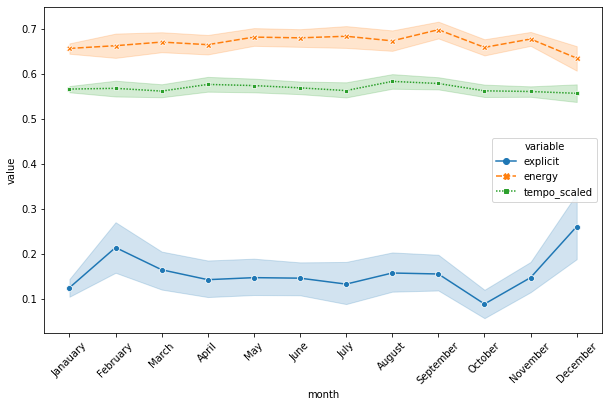

In [31]:
month_map = {1:'Janauary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

df["tempo_scaled"] = df["tempo"] / df["tempo"].max() # changing to fit scale

fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(ax=ax, x='month', markers=True, style='variable', y='value', hue='variable', data=pd.melt(df[["explicit", "energy","month","tempo_scaled"]], ['month']))
ax.set_xticks(range(1,13))
ax.set_xticklabels(month_map.values())
ax.tick_params(axis='x', rotation=45)